#### **Materia:** Recuperación de la Información
#### **Nombre:** Byron Carpio
#### **Grupo:** GR1CC

# Ejercicio 4: Modelo Probabilístico
## Objetivo de la práctica

* Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
* Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
* Comparar la recuperación con BM25 frente a TF-IDF.
* Analizar visualmente las diferencias entre los modelos.Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.


## Parte 0: Carga del Corpus


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
!pip install rank_bm25
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF
### Actividad

1. Utiliza el corpus cargado.
2. Construye la matriz de términos (TF), y calcula la frecuencia de documentos (DF)
3. Calcula TF-IDF utilizando sklearn.
4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.


In [3]:
vocabulario = set ()
for doc in newsgroupsdocs:
    # lower: convierte a minúsculas
    # strip: elimina . de inicio y final
    # split: separa el texto por espacios
    for word in doc.lower().strip('.').split(" "):
        vocabulario.add(word)

print("Números de documentos: ", len(newsgroupsdocs))
#print(len(vocabulario))
#print(type(newsgroupsdocs))
#print(vocabulario)

Números de documentos:  18846


In [4]:
# Vectorizar
tfidf_vectorizer=TfidfVectorizer(use_idf=True, lowercase=True)

# just send in all your docs here
# fit: entrena el modelo

tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(newsgroupsdocs)
#print ()

In [5]:
# TF-IDF
df = pd.DataFrame(tfidf_vectorizer_vectors.T.todense(), index=tfidf_vectorizer.get_feature_names_out())
# Ordena el Data Frame
df

,0,1,2,3,4,5,6,7,8,9,...,18836,18837,18838,18839,18840,18841,18842,18843,18844,18845
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217494,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzzzzz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzzzzzt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
³ation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ýé,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Muestra las dimensiones de la matriz TF-IDF
print(tfidf_vectorizer_vectors.shape)

(18846, 134410)


## Parte 2: Ranking de documentos usando TF-IDF
### Actividad

1. Dada una consulta, construye el vector de consulta
2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF
3. Genera un ranking de los documentos ordenados por relevancia.
4. Muestra los resultados en una tabla.


In [7]:
query = "car"

In [8]:
# Vectorizar la consulta 
vertorized_query=tfidf_vectorizer.transform([query])

In [9]:
df = pd.DataFrame(vertorized_query.T.todense(), index=tfidf_vectorizer.get_feature_names_out())
df

,0
00,0.0
000,0.0
0000,0.0
00000,0.0
000000,0.0
...,...
zzzzzz,0.0
zzzzzzt,0.0
³ation,0.0
ýé,0.0


In [10]:
# Calcular la distania
distancia = cosine_similarity(vertorized_query, tfidf_vectorizer_vectors)

In [11]:
# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame({
    'indice_documento': range(len(newsgroupsdocs)),
    'similitud_coseno': distancia.flatten()
})

In [12]:
# Ordenar de mayor a menor similitud
df_resultados_ordenado_tfidf = df_resultados.sort_values(by='similitud_coseno', ascending=False)

In [13]:
# Agregar columna con contenido del documento
df_resultados_ordenado_tfidf['contenido'] = df_resultados_ordenado_tfidf['indice_documento'].apply(
    lambda idx: newsgroupsdocs[idx][:200].replace('\n', ' ')
)

In [14]:
# Mostrar los 10 documentos más relevantes
top_10 = df_resultados_ordenado_tfidf.head(10)
#print(top_10[['indice_documento', 'similitud_coseno', 'contenido']])
display(top_10[['indice_documento', 'similitud_coseno', 'contenido']])

,indice_documento,similitud_coseno,contenido
15931,15931,0.529284,Definitely! Safety is an important criterium...
15608,15608,0.460818,"If you don't already know it, you should call..."
10167,10167,0.448248,"Poor Matthew. A million posters to call ""yo..."
7651,7651,0.447693,Is it ok to take the car out of gear without u...
6085,6085,0.443013,"I bought a car with a defunct engine, to use f..."
17827,17827,0.428068,"Hello everyone, I have an insurance questio..."
10386,10386,0.407016,I was wondering if anyone out there could enli...
11842,11842,0.399956,Here is a story. I bought a car about two wee...
1327,1327,0.391228,I have had my Probe looked at twice by my loc...
9366,9366,0.382632,Can taking the car to a car wash hurt the car'...


## Parte 3: Ranking con BM25
### Actividad

1. Implementa un sistema de recuperación usando el modelo BM25.
2. Usa la misma consulta del ejercicio anterior.
3. Calcula el score BM25 para cada documento y genera un ranking.
4. Compara manualmente con el ranking de TF-IDF.


In [15]:
from rank_bm25 import BM25Okapi

In [16]:
# Preprocesar documentos (tokenizar)
tokenized_docs = [doc.lower().split() for doc in newsgroupsdocs]

In [17]:
# Construir el modelo BM25
bm25 = BM25Okapi(tokenized_docs)
tokenized_query = query.lower().split()

In [18]:
# SCORE BM25
# Calcular puntuaciones BM25
scores = bm25.get_scores(tokenized_query)

In [19]:
# Crear DataFrame con resultados
df_resultados = pd.DataFrame({
    'indice_documento': range(len(scores)),
    'bm25_score': scores
})


In [20]:
# Ordenar por mayor score en BM25
df_resultados_ordenado_bm25 = df_resultados.sort_values(by='bm25_score', ascending=False)

In [22]:
# Agregar contenido (truncado)
df_resultados_ordenado_bm25['contenido'] = df_resultados_ordenado_bm25['indice_documento'].apply(
    lambda idx: newsgroupsdocs[idx][:200].replace('\n', ' ')
)

In [23]:
# Mostrar top 10 resultados
display(df_resultados_ordenado_bm25.head(10))

,indice_documento,bm25_score,contenido
17827,17827,7.424453,"Hello everyone, I have an insurance questio..."
14261,14261,7.410330,Bad driving habits can damage a car in a coup...
15931,15931,7.374556,Definitely! Safety is an important criterium...
6085,6085,7.336353,"I bought a car with a defunct engine, to use f..."
10167,10167,7.322228,"Poor Matthew. A million posters to call ""yo..."
6199,6199,7.263024,Anybody got any good/bad experience with selli...
13011,13011,7.221662,"Hi, maybe someone can help me here... I am loo..."
9366,9366,7.194076,Can taking the car to a car wash hurt the car'...
1444,1444,7.183955,F O R S A L E \t\t\t================ \t\tTr...
7651,7651,7.161675,Is it ok to take the car out of gear without u...


In [24]:
#Comparación

# Comparar los rankings de TF-IDF y BM25
# 10 mejores documentos de cada modelo
top_tfidf = df_resultados_ordenado_tfidf.head(10)['indice_documento'].tolist()
top_bm25 = df_resultados_ordenado_bm25.head(10)['indice_documento'].tolist()

print("Top 10 documentos según TF-IDF:", top_tfidf)
print("Top 10 documentos según BM25:", top_bm25)

# Ver cuántos documentos coinciden en ambos rankings
coincidencias = set(top_tfidf).intersection(set(top_bm25))
print(f"Coincidencias en ambos rankings: {len(coincidencias)} documentos")
print("Índices coincidentes:", list(coincidencias))


Top 10 documentos según TF-IDF: [15931, 15608, 10167, 7651, 6085, 17827, 10386, 11842, 1327, 9366]
Top 10 documentos según BM25: [17827, 14261, 15931, 6085, 10167, 6199, 13011, 9366, 1444, 7651]
Coincidencias en ambos rankings: 6 documentos
Índices coincidentes: [17827, 7651, 6085, 9366, 10167, 15931]


## Parte 4: Comparación visual entre TF-IDF y BM25
### Actividad

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Punto 1
# TF-IDF y BM25 por índice de documento
df_comparacion = pd.merge(
    df_resultados_ordenado_tfidf[['indice_documento', 'similitud_coseno']],
    df_resultados_ordenado_bm25[['indice_documento', 'bm25_score']],
    on='indice_documento'
)

In [26]:
# top 10 documentos según TF-IDF (puedes usar BM25 si prefieres)
top_docs = df_comparacion.sort_values(by='similitud_coseno', ascending=False).head(10)

# Convertimos a formato largo para graficar con seaborn
df_long = pd.melt(
    top_docs,
    id_vars='indice_documento',
    value_vars=['similitud_coseno', 'bm25_score'],
    var_name='modelo',
    value_name='score'
)

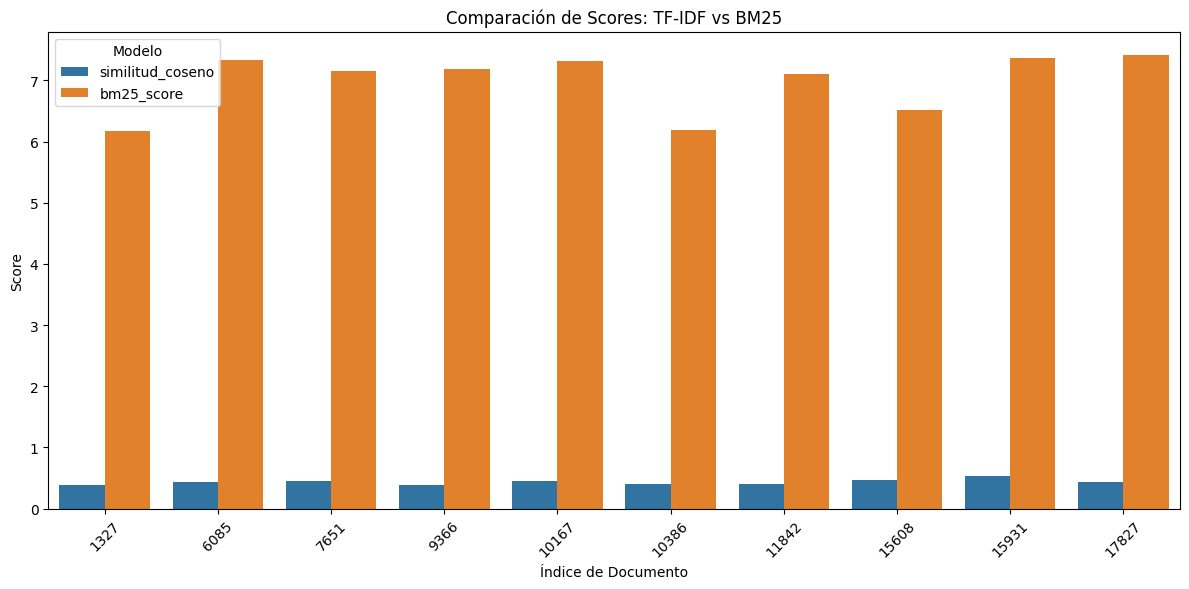

In [27]:
# Gráfico de barras comparativo
plt.figure(figsize=(12, 6))
sns.barplot(x='indice_documento', y='score', hue='modelo', data=df_long)
plt.title('Comparación de Scores: TF-IDF vs BM25')
plt.xlabel('Índice de Documento')
plt.ylabel('Score')
plt.legend(title='Modelo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

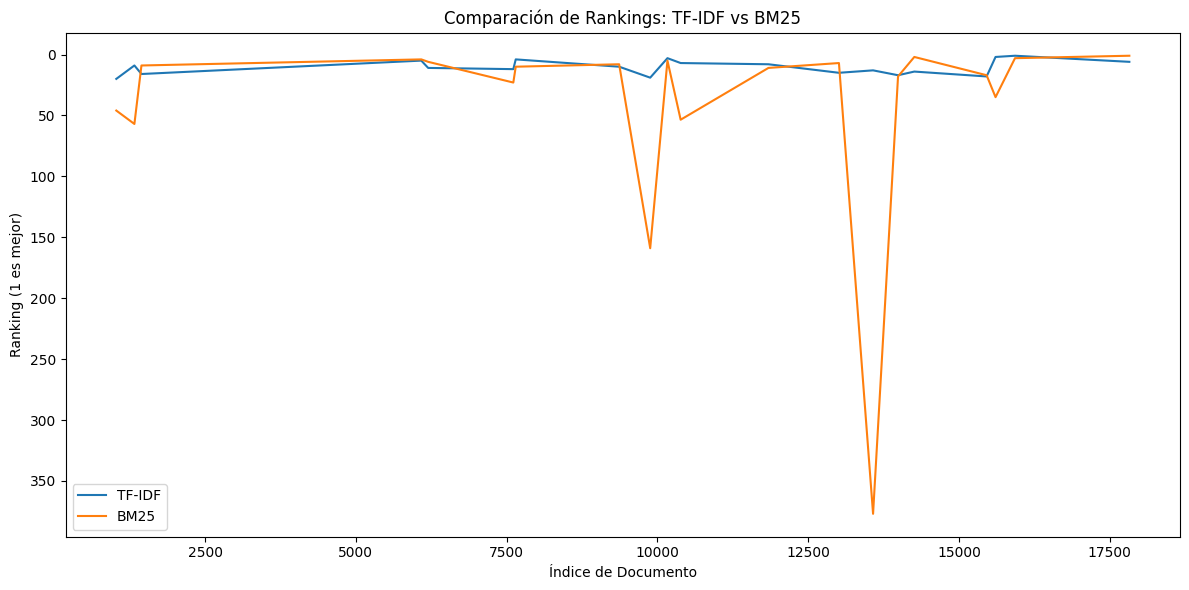

In [28]:
# Punto 2
# Agregar ranking para cada modelo
df_comparacion['ranking_tfidf'] = df_comparacion['similitud_coseno'].rank(ascending=False)
df_comparacion['ranking_bm25'] = df_comparacion['bm25_score'].rank(ascending=False)

# Gráfico de líneas para comparar rankings
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_comparacion.head(20), x='indice_documento', y='ranking_tfidf', label='TF-IDF')
sns.lineplot(data=df_comparacion.head(20), x='indice_documento', y='ranking_bm25', label='BM25')
plt.title('Comparación de Rankings: TF-IDF vs BM25')
plt.xlabel('Índice de Documento')
plt.ylabel('Ranking (1 es mejor)')
# Muestra el mejor ranking arriba
plt.gca().invert_yaxis()  
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
# Punto 3 

df_comparacion['score_diff'] = df_comparacion['bm25_score'] - df_comparacion['similitud_coseno']

# Documentos donde BM25 puntúa mucho más que TF-IDF
print("Documentos donde BM25 da más score que TF-IDF:")
display(df_comparacion.sort_values(by='score_diff', ascending=False).head(5))

# Documentos donde TF-IDF puntúa más que BM25
print("\nDocumentos donde TF-IDF da más score que BM25:")
display(df_comparacion.sort_values(by='score_diff').head(5))


Documentos donde BM25 da más score que TF-IDF:


,indice_documento,similitud_coseno,bm25_score,ranking_tfidf,ranking_bm25,score_diff
13,14261,0.353717,7.410330,14.0,2.0,7.056613
5,17827,0.428068,7.424453,6.0,1.0,6.996385
4,6085,0.443013,7.336353,5.0,4.0,6.893340
10,6199,0.376317,7.263024,11.0,6.0,6.886707
2,10167,0.448248,7.322228,3.0,5.0,6.873980



Documentos donde TF-IDF da más score que BM25:


,indice_documento,similitud_coseno,bm25_score,ranking_tfidf,ranking_bm25,score_diff
40,6491,0.280669,0.0,41.0,9664.0,-0.280669
64,5159,0.243476,0.0,65.0,9664.0,-0.243476
65,12597,0.243471,0.0,66.0,9664.0,-0.243471
72,4906,0.231507,0.0,73.0,9664.0,-0.231507
77,9967,0.224782,0.0,78.0,9664.0,-0.224782


### Interpretación de resultados

Al comparar los modelos TF-IDF y BM25:

* BM25>: Da más peso a palabras clave frecuentes en documentos cortos, penalizando los términos repetidos.
* TF-IDF: Pondera de una manera mas alta los términos raros, pero no considera la longitud del documento.

Por lo tanto:

En documentos cortos el **BM-25** tiene mejor score, mientras que para documentos con términos raros, pero menos relevantes es mejor **TF-IDF**.

## Parte 5: Evaluación con consulta relevante
## Actividad

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?


In [30]:
query = 'car'
# Vectorizar la consulta 
vertorized_query=tfidf_vectorizer.transform([query])

In [31]:
def precision_at_k(ranked_indices, relevantes, k=3):
    top_k = ranked_indices[:k]
    hits = sum([1 for idx in top_k if idx in relevantes])
    return hits / k

In [32]:
def average_precision(ranked_indices, relevantes):
    hits = 0
    sum_precisions = 0
    for i, idx in enumerate(ranked_indices, start=1):
        if idx in relevantes:
            hits += 1
            sum_precisions += hits / i
    return sum_precisions / len(relevantes) if relevantes else 0

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular similitudes entre consulta y documentos
cosine_similarities = cosine_similarity(vertorized_query, tfidf_vectorizer_vectors).flatten()

# Crear un DataFrame con los datos
df_resultados = pd.DataFrame({'Documento': newsgroupsdocs, 'Similitud coseno': cosine_similarities})
df_resultados = df_resultados.sort_values(by='Similitud coseno', ascending=False)
tf_idf_results = df_resultados.head(10)
tf_idf_results

,Documento,Similitud coseno
15931,\nDefinitely!\n\nSafety is an important criter...,0.529284
15608,"\nIf you don't already know it, you should cal...",0.460818
10167,"\nPoor Matthew. A million posters to call ""y...",0.448248
7651,Is it ok to take the car out of gear without u...,0.447693
6085,"I bought a car with a defunct engine, to use f...",0.443013
17827,"Hello everyone,\n I have an insurance questi...",0.428068
10386,I was wondering if anyone out there could enli...,0.407016
11842,Here is a story. I bought a car about two wee...,0.399956
1327,\nI have had my Probe looked at twice by my lo...,0.391228
9366,Can taking the car to a car wash hurt the car'...,0.382632


In [44]:
# Lista ordenada de documentos según similitud coseno
ranked_ids = tf_idf_results.index.tolist()

# Top 10 relevantes
relevant_documents = ranked_ids[:10]

# Función Precision@3
def precision_at_10(ranking, relevantes):
    top10 = ranking[:10]
    relevantes_en_top10 = sum([1 for doc in top10 if doc in relevantes])
    return relevantes_en_top10 / 10

# Calcular Precision@3
p10 = precision_at_10(ranked_ids, relevant_documents)
print(f"Precision@10: {p10:.2f}")

Precision@10: 1.00


In [41]:
# Función para calcular Average Precision
def average_precision(ranking, relevantes):
    hits = 0
    sum_precisions = 0
    for i, doc_id in enumerate(ranking):
        if doc_id in relevantes:
            hits += 1
            sum_precisions += hits / (i + 1)
    return sum_precisions / len(relevantes) if relevantes else 0

# IDs ordenados por similitud coseno (ranking)
ranked_ids = tf_idf_results.index.tolist()

# Top 10 relevantes
relevant_documents = ranked_ids[:10]

# Calcular Average Precision
ap = average_precision(ranked_ids, relevant_documents)
print(f"TF_IDF: Average Precision (AP): {ap:.4f}")


TF_IDF: Average Precision (AP): 1.0000


In [42]:
ranked_ids_bm25 = df_resultados_ordenado_bm25.head(10).index.tolist()
ap_bm25 = average_precision(ranked_ids_bm25, relevant_documents)  # Puedes usar el mismo conjunto relevante
print(f"BM25: Average Precision (AP): {ap_bm25:.4f}")


BM25: Average Precision (AP): 0.4442


### ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

El valor promedio usando TF-IDF es de 1.0000, mientras que usando BM25 es de 0.4442, lo que significa que para la query dada 'car' en los 10 mejores resultados TF-IDF tuvo un mejor desempeño que BM25, esto puede deberse a que la palabra clave (query) tenia una puntuación muy fuerte.
